In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!pip install keras-tuner
import kerastuner
from tensorflow import keras
from kerastuner.tuners import RandomSearch
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters

In [3]:
%cd '/content/drive/Shareddrives/AI_tlPicker/models'
!pwd
!ls

/content/drive/Shareddrives/AI_tlPicker/models
/content/drive/Shareddrives/AI_tlPicker/models
a.npy	    BRA16Z.csv	BRA21Z.csv  BRA25Z.csv	    BRAPicks21.csv
BRA13E.csv  BRA18E.csv	BRA22E.csv  BRA26E.csv	    BRAPicks22.csv
BRA13H.csv  BRA18H.csv	BRA22H.csv  BRA26H.csv	    BRAPicks23.csv
BRA13N.csv  BRA18N.csv	BRA22N.csv  BRA26N.csv	    BRAPicks24.csv
BRA13Z.csv  BRA18Z.csv	BRA22Z.csv  BRA26Z.csv	    BRAPicks25.csv
BRA14E.csv  BRA19E.csv	BRA23E.csv  BRA27E.csv	    BRAPicks26.csv
BRA14H.csv  BRA19H.csv	BRA23H.csv  BRA27H.csv	    BRAPicks27.csv
BRA14N.csv  BRA19N.csv	BRA23N.csv  BRA27N.csv	    event.csv
BRA14Z.csv  BRA19Z.csv	BRA23Z.csv  BRA27Z.csv	    Input_ML.csv
BRA15E.csv  BRA20E.csv	BRA24E.csv  BRAPicks13.csv  New_model30.h5
BRA15H.csv  BRA20H.csv	BRA24H.csv  BRAPicks14.csv  Output.npy
BRA15N.csv  BRA20N.csv	BRA24N.csv  BRAPicks15.csv  untitled_project
BRA15Z.csv  BRA20Z.csv	BRA24Z.csv  BRAPicks16.csv
BRA16E.csv  BRA21E.csv	BRA25E.csv  BRAPicks18.csv
BRA16H.csv  BRA21H.csv	BRA25H.csv 

In [4]:
s=23924

In [5]:
import numpy as np

load a and output

In [6]:
Output = np.load("Output.npy")
a = np.load("a.npy")

In [7]:

X_test =a[0:1000]
Y_test = Output[0:1000]
a= a.reshape(s,4,3000,1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(a[1000:], Output[1000:], test_size=.3,shuffle=False)#shuffle=False

del a, Output

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Lambda
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
#create model


def model_fn(hp):

  LR = hp.Choice('learning_rate',[0.001, 0.0005, 0.0001])
  NUM_DIMS = hp.Int('num_dims',8,32,8)
  NUM_LAYERS = hp.Int('num_layers',1,5)
  L1_NUM_FILTERS = hp.Int('11_num_filters',8,64,8)
  L2_NUM_FILTERS = hp.Int('l2_num_filters',8,64,8)
  L3_NUM_FILTERS = hp.Int('l3_num_filters',8,64,8)
  L4_NUM_FILTERS = hp.Int('l4_num_filters',8,64,8)
  L5_NUM_FILTERS = hp.Int('l5_num_filters',8,64,8)
  Activation1=hp.Choice('activation1', values=['relu', 'sigmoid'], default='relu')
  Activation2=hp.Choice('activation2', values=['relu','sigmoid'], default='relu')
  Activation3=hp.Choice('activation3', values=['relu','sigmoid'], default='relu')
  Activation4=hp.Choice('activation4', values=['relu','sigmoid'], default='relu')
  Activation5=hp.Choice('activation5', values=['relu','sigmoid'], default='relu')


  model = Sequential()
  model.add(Conv2D(L1_NUM_FILTERS, (2, 2), activation=Activation1, input_shape=(4,3000,1), padding='SAME'))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(L2_NUM_FILTERS, (3, 3), activation=Activation2, padding='SAME'))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(L3_NUM_FILTERS, (3, 3), activation=Activation3, padding='SAME'))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(L4_NUM_FILTERS, (3, 3), activation=Activation4, padding='SAME'))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Conv2D(L5_NUM_FILTERS, (3, 3), activation=Activation5, padding='SAME'))
  model.add(MaxPooling2D((2, 2), padding='same'))
  model.add(Flatten())

  for _ in range(NUM_LAYERS):
    model.add(Dense(NUM_DIMS, activation='relu'))

  model.add(Dense(units = 1, activation = 'relu'))
  model.compile(optimizer = Adam(LR), loss = 'mse',metrics=[keras.metrics.RootMeanSquaredError()])
  return model


In [37]:
tuner_hb = Hyperband(model_fn,max_epochs=100,objective=("root_mean_squared_error","min"),seed=42,executions_per_trial=1)

SyntaxError: ignored

In [27]:
tuner_hb.search(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_val,Y_val))

best_model = tuner_hb.get_best_models(num_models=1)[0]




Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
learning_rate     |0.0001            |?                 
num_dims          |8                 |?                 
num_layers        |3                 |?                 
11_num_filters    |24                |?                 
l2_num_filters    |56                |?                 
l3_num_filters    |24                |?                 
l4_num_filters    |40                |?                 
l5_num_filters    |8                 |?                 
activation1       |sigmoid           |?                 
activation2       |relu              |?                 
activation3       |sigmoid           |?                 
activation4       |relu              |?                 
activation5       |relu              |?                 
tuner/epochs      |2                 |?                 
tuner/initial_e...|0                 |?                 
tuner/bracket     |4                 |?                 
tune

ValueError: ignored

In [21]:
best_model.evaluate(X_val, Y_val)

215/215 [==============================] - 4s 14ms/step - loss: 8.6957 - accuracy: 0.0000e+00


[8.695672988891602, 0.0]

In [13]:
#history = model.fit(X_train,Y_train,epochs=100,batch_size=100,)

In [14]:
#import pandas as pd
#plt=pd.DataFrame(history.history).plot(figsize=(12,10))

In [15]:
import pandas as pd

X_test= X_test.reshape(1000,4,3000,1)
Y_pred=best_model.predict(X_test)
Y_pred=pd.DataFrame(Y_pred)
Y_pred.columns=['Y_Pred']
Y_pred

,Y_Pred
0,2.870873
1,2.870582
2,2.870730
3,2.871548
4,2.870514
...,...
995,2.868798
996,2.870055
997,2.868962
998,2.867830


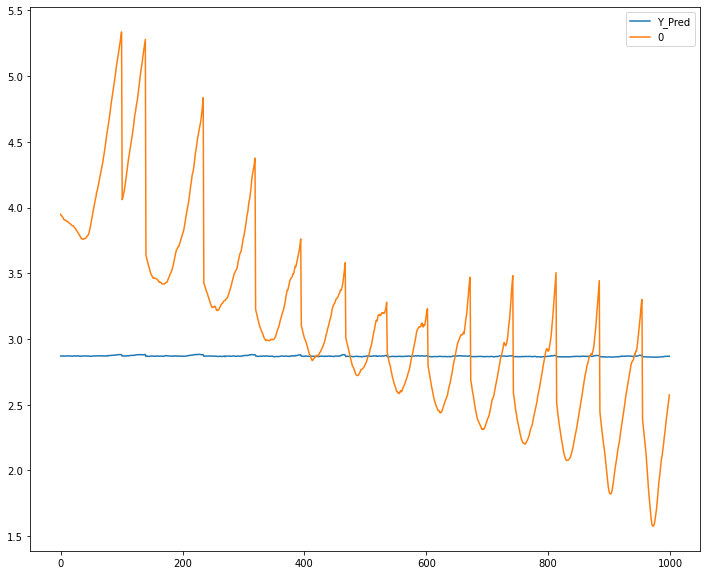

In [16]:
import matplotlib.pyplot as plt
Y_test = pd.DataFrame(Y_test)
#Y_train.columns=['Y_test']
ax= Y_pred[0:1000].plot(legend=True)
Y_test[0:1000].plot(ax=ax,figsize=(12,10))



In [17]:
best_model.save('HyperModel1.h5') 

NotImplementedError: ignored